In [4]:
import numpy as np
from matplotlib import pyplot as plt

import petab.v1.C as C
import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import pypesto.sample as sample
import pypesto.visualize as visualize

# import src._petab.equilibrium as eq
from polypesto.core.pypesto import create_problem_set, load_pypesto_problem
from polypesto.models.sbml import equilibrium
from polypesto.core.params import ParameterContainer
from polypesto.utils.plot import plot_all_measurements
from experiments.equilibrium.problem import exp_0
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pc = ParameterContainer.from_json("/PolyPESTO/experiments/equilibrium/params.json")
pg = pc.get_parameter_group("Fast")

paths = create_problem_set(equilibrium, pg, exp_0(), force_compile=True)

Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Compiling amici model to folder /PolyPESTO/amici_models/0.30.0/equilibrium.
2025-02-20 05:27:14.481 - amici.petab.sbml_import - INFO - Importing model ...
2025-02-20 05:27:14.481 - amici.petab.sbml_import - INFO - Validating PEtab problem ...
Visualization table not available. Skipping.
2025-02-20 05:27:14.498 - amici.petab.sbml_import - INFO - Model name is 'equilibrium'.
Writing model code to '/PolyPESTO/amici_models/0.30.0/equilibrium'.
2025-02-20 05:27:14.500 - amici.petab.sbml_import - INFO - Species: 2
2025-02-20 05:27:14.500 - amici.petab.sbml_import - INFO - Global parameters: 2
2025-02-20 05:27:14.501 - amici.petab.sbml_import - INFO - Reactions: 0
2025-02-20 05:27:14.521 - amici.petab.sbml_import - INFO - Observables: 2
2025-02-20 05:27:14.522 - amici.petab.sbml_import - INFO - Sigmas: 2
2025-02-20 05:27:14.523 - amici.petab.sbml_import - DEBU

Creating SBML model (Simple Chemical Equilibrium).
                 filename : /PolyPESTO/src/data/fitting/equilibrium/petab/common/equilibrium.xml
         file size (byte) : 2052
           read time (ms) : 1.471758
        c-check time (ms) : 0.709057
      validation error(s) : 0
    (consistency error(s)): 0
    validation warning(s) : 0
  (consistency warning(s)): 0
PETAB IMPORTER: Output folder:  /PolyPESTO/amici_models/0.30.0/equilibrium
PRINTING OUTPUT FOLDER /PolyPESTO/amici_models/0.30.0/equilibrium


2025-02-20 05:27:14.608 - amici.de_model - DEBUG - Finished simplifying xdot                      ++ (1.08E-03s)
2025-02-20 05:27:14.609 - amici.de_model - DEBUG - Finished computing xdot                         + (4.09E-03s)
2025-02-20 05:27:14.614 - amici.de_model - DEBUG - Finished simplifying x0                        ++ (6.54E-05s)
2025-02-20 05:27:14.615 - amici.de_model - DEBUG - Finished computing x0                           + (3.09E-03s)
2025-02-20 05:27:14.620 - amici.de_model - DEBUG - Finished simplifying w                         ++ (5.96E-05s)
2025-02-20 05:27:14.620 - amici.de_model - DEBUG - Finished computing w                            + (2.68E-03s)
2025-02-20 05:27:14.641 - amici.de_model - DEBUG - Finished simplifying Jy                      ++++ (8.99E-03s)
2025-02-20 05:27:14.642 - amici.de_model - DEBUG - Finished computing Jy                         +++ (1.17E-02s)
2025-02-20 05:27:14.662 - amici.de_model - DEBUG - Finished simplifying y                       

running build_ext
------------------------------ model_ext ------------------------------
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Appending flags from AMICI_CXXFLAGS: -fopenmp
-- Appending

In [6]:
yaml_path = list(paths.values())[0]

importer, problem = load_pypesto_problem(yaml_path, "equilibrium")

Visualization table not available. Skipping.


PETAB IMPORTER: Output folder:  /PolyPESTO/amici_models/0.30.0/equilibrium
PRINTING OUTPUT FOLDER /PolyPESTO/amici_models/0.30.0/equilibrium
Hello world! I'm an AmiciObjective!
Problem created!


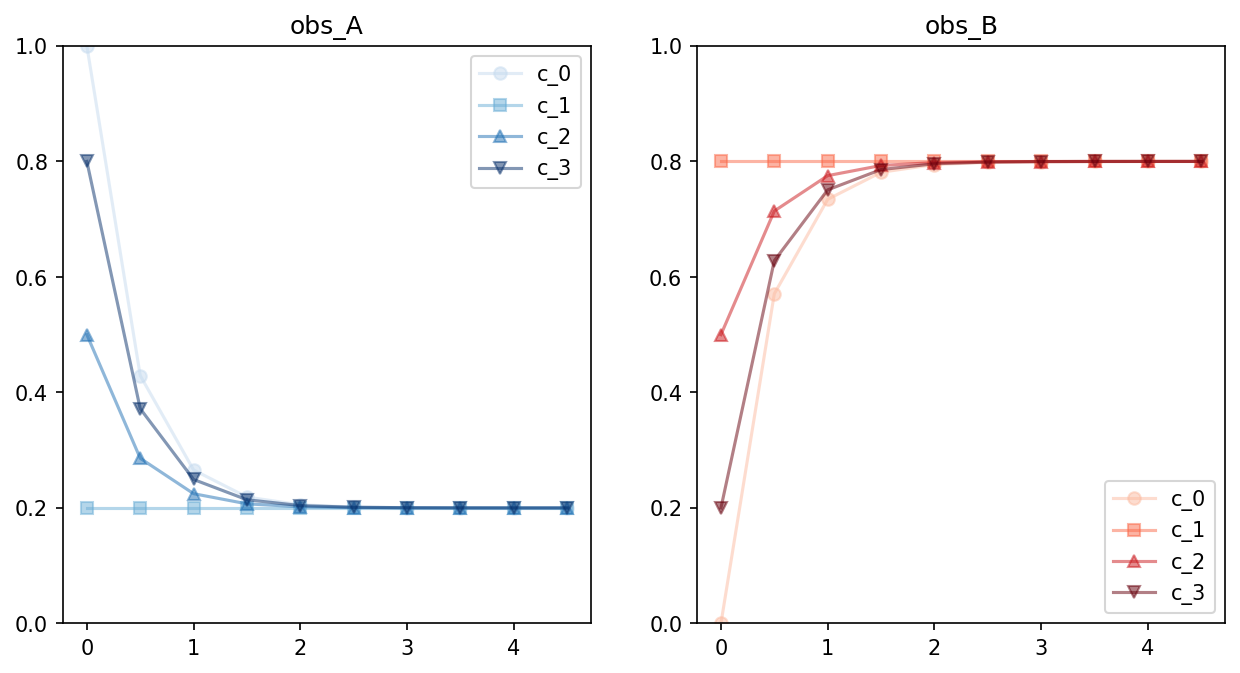

In [7]:
plot_all_measurements(
    importer.petab_problem.measurement_df,
    group_by=C.OBSERVABLE_ID,
    format_axes_kwargs={
        "set_ylim": (0, 1),
    },
    plot_style="both",
    alpha=0.5,
)
plt.show()

In [9]:
optimizer = optimize.ScipyOptimizer()  # method="Nelder-Mead")
history_options = pypesto.HistoryOptions(
    trace_record=True, storage_file="history_{id}.csv"
)
engine = pypesto.engine.MultiProcessEngine()
n_starts = 10

result = optimize.minimize(
    problem=problem,
    optimizer=optimizer,
    n_starts=n_starts,
    engine=engine,
    history_options=history_options,
)

Engine will use up to 8 processes (= CPU count).
  0%|                                                    | 0/10 [00:00<?, ?it/s]

PRINTING OUTPUT FOLDERPRINTING OUTPUT FOLDERPRINTING OUTPUT FOLDERPRINTING OUTPUT FOLDERPRINTING OUTPUT FOLDER    PRINTING OUTPUT FOLDERPRINTING OUTPUT FOLDER/PolyPESTO/amici_models/0.30.0/equilibrium  /PolyPESTO/amici_models/0.30.0/equilibrium/PolyPESTO/amici_models/0.30.0/equilibriumPRINTING OUTPUT FOLDER /PolyPESTO/amici_models/0.30.0/equilibrium/PolyPESTO/amici_models/0.30.0/equilibrium/PolyPESTO/amici_models/0.30.0/equilibrium

 /PolyPESTO/amici_models/0.30.0/equilibrium




/PolyPESTO/amici_models/0.30.0/equilibrium
PRINTING OUTPUT FOLDER /PolyPESTO/amici_models/0.30.0/equilibrium
PRINTING OUTPUT FOLDER /PolyPESTO/amici_models/0.30.0/equilibrium


100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  4.93it/s]


In [ ]:
problem.objective.x_names

In [10]:
sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(),
    n_chains=3,
)

n_samples = 1000
result = sample.sample(
    problem,
    n_samples=n_samples,
    sampler=sampler,
    x0=np.array([2, 2]),
    filename=None,
)
elapsed_time = result.sample_result.time
print(f"Elapsed time: {round(elapsed_time,2)}")

Initializing betas with "near-exponential decay".
100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 604.26it/s]
Elapsed time: 1.6560748210000007


Elapsed time: 1.66


/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1117: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


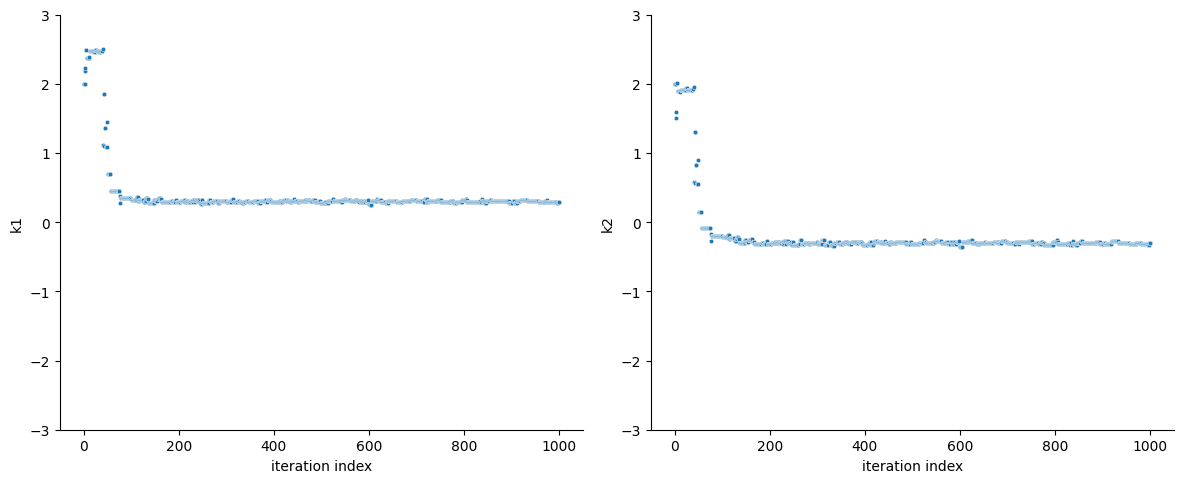

In [11]:
ax = visualize.sampling_parameter_traces(result, use_problem_bounds=True, size=(12, 5))